In [125]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns 
import warnings
from tqdm import tqdm
from datetime import datetime
import json

plt.style.use('fivethirtyeight')
plt.rcParams['figure.figsize'] = [20, 8]


In [126]:
train = pd.read_csv('../data/train.csv')
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3000 entries, 0 to 2999
Data columns (total 23 columns):
id                       3000 non-null int64
belongs_to_collection    604 non-null object
budget                   3000 non-null int64
genres                   2993 non-null object
homepage                 946 non-null object
imdb_id                  3000 non-null object
original_language        3000 non-null object
original_title           3000 non-null object
overview                 2992 non-null object
popularity               3000 non-null float64
poster_path              2999 non-null object
production_companies     2844 non-null object
production_countries     2945 non-null object
release_date             3000 non-null object
runtime                  2998 non-null float64
spoken_languages         2980 non-null object
status                   3000 non-null object
tagline                  2403 non-null object
title                    3000 non-null object
Keywords             

In [127]:
test = pd.read_csv('../data/test.csv')
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4398 entries, 0 to 4397
Data columns (total 22 columns):
id                       4398 non-null int64
belongs_to_collection    877 non-null object
budget                   4398 non-null int64
genres                   4382 non-null object
homepage                 1420 non-null object
imdb_id                  4398 non-null object
original_language        4398 non-null object
original_title           4398 non-null object
overview                 4384 non-null object
popularity               4398 non-null float64
poster_path              4397 non-null object
production_companies     4140 non-null object
production_countries     4296 non-null object
release_date             4397 non-null object
runtime                  4394 non-null float64
spoken_languages         4356 non-null object
status                   4396 non-null object
tagline                  3535 non-null object
title                    4395 non-null object
Keywords            

#### Thoughts on variables:
- A big **budget** does not necessarily leads to a big revenue, money needs to be spent on the right places.
- a **language** might not influence the revenue, but the **number of spoken languages** might do. (check if the number of spoken languages influences the revenue)
- **popularity** is a floating varible; it does not seem to influence the revenue so I decided to drop it
- **Crew** is definitely an very important factor in predicting the box office. I can import some external data to measure the influence of an individual actor/producer, like the number of followers on Twitter.
- Does **ratings** of the movies influence revenues?


#### Unused columns for modeling:
- id
- imdb_id
- original_title
- (overview0)
- popularity (what is it exactly?)
- poster_path

### Thoughts about external datasets:
- Box offices of movies increasingly rely on their performance in foreign markets; is it possible to integrate the information of foreign market distribution?
- Missing budget/revenue data, it can be recovered(scrapped from imdbpro)
- 

In [128]:
# drop these columns, for now
train = train.drop(columns=['id', 'popularity', 'homepage', 'poster_path', 'status', 'original_title', 'overview', 'tagline'])
test = test.drop(columns=['id', 'popularity', 'homepage', 'poster_path', 'status', 'original_title', 'overview', 'tagline'])

# save imdb_id, title for now

In [129]:
train['budget'] = train['budget'].replace(0, np.nan)
test['budget'] = test['budget'].replace(0, np.nan)
train['revenue'] = train['revenue'].replace(0, np.nan)

## EDA

In [130]:
train.head(100)

,belongs_to_collection,budget,genres,imdb_id,original_language,production_companies,production_countries,release_date,runtime,spoken_languages,title,Keywords,cast,crew,revenue
0,"[{'id': 313576, 'name': 'Hot Tub Time Machine ...",14000000.0,"[{'id': 35, 'name': 'Comedy'}]",tt2637294,en,"[{'name': 'Paramount Pictures', 'id': 4}, {'na...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/20/15,93.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Hot Tub Time Machine 2,"[{'id': 4379, 'name': 'time travel'}, {'id': 9...","[{'cast_id': 4, 'character': 'Lou', 'credit_id...","[{'credit_id': '59ac067c92514107af02c8c8', 'de...",12314651
1,"[{'id': 107674, 'name': 'The Princess Diaries ...",40000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 18, 'nam...",tt0368933,en,"[{'name': 'Walt Disney Pictures', 'id': 2}]","[{'iso_3166_1': 'US', 'name': 'United States o...",8/6/04,113.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Princess Diaries 2: Royal Engagement,"[{'id': 2505, 'name': 'coronation'}, {'id': 42...","[{'cast_id': 1, 'character': 'Mia Thermopolis'...","[{'credit_id': '52fe43fe9251416c7502563d', 'de...",95149435
2,NaN,3300000.0,"[{'id': 18, 'name': 'Drama'}]",tt2582802,en,"[{'name': 'Bold Films', 'id': 2266}, {'name': ...","[{'iso_3166_1': 'US', 'name': 'United States o...",10/10/14,105.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Whiplash,"[{'id': 1416, 'name': 'jazz'}, {'id': 1523, 'n...","[{'cast_id': 5, 'character': 'Andrew Neimann',...","[{'credit_id': '54d5356ec3a3683ba0000039', 'de...",13092000
3,NaN,1200000.0,"[{'id': 53, 'name': 'Thriller'}, {'id': 18, 'n...",tt1821480,hi,NaN,"[{'iso_3166_1': 'IN', 'name': 'India'}]",3/9/12,122.0,"[{'iso_639_1': 'en', 'name': 'English'}, {'iso...",Kahaani,"[{'id': 10092, 'name': 'mystery'}, {'id': 1054...","[{'cast_id': 1, 'character': 'Vidya Bagchi', '...","[{'credit_id': '52fe48779251416c9108d6eb', 'de...",16000000
4,NaN,NaN,"[{'id': 28, 'name': 'Action'}, {'id': 53, 'nam...",tt1380152,ko,NaN,"[{'iso_3166_1': 'KR', 'name': 'South Korea'}]",2/5/09,118.0,"[{'iso_639_1': 'ko', 'name': '한국어/조선말'}]",Marine Boy,NaN,"[{'cast_id': 3, 'character': 'Chun-soo', 'cred...","[{'credit_id': '52fe464b9251416c75073b43', 'de...",3923970
5,NaN,8000000.0,"[{'id': 16, 'name': 'Animation'}, {'id': 12, '...",tt0093743,en,NaN,NaN,8/6/87,83.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Pinocchio and the Emperor of the Night,NaN,"[{'cast_id': 6, 'character': 'Pinocchio (voice...","[{'credit_id': '52fe46f49251416c9106558b', 'de...",3261638
6,NaN,14000000.0,"[{'id': 27, 'name': 'Horror'}, {'id': 53, 'nam...",tt0431021,en,"[{'name': 'Ghost House Pictures', 'id': 768}, ...","[{'iso_3166_1': 'US', 'name': 'United States o...",8/30/12,92.0,"[{'iso_639_1': 'en', 'name': 'English'}]",The Possession,NaN,"[{'cast_id': 23, 'character': 'Clyde', 'credit...","[{'credit_id': '52fe4981c3a368484e12ee29', 'de...",85446075
7,NaN,NaN,"[{'id': 99, 'name': 'Documentary'}]",tt0391024,en,NaN,NaN,1/15/04,84.0,"[{'iso_639_1': 'ar', 'name': 'العربية'}, {'iso...",Control Room,"[{'id': 917, 'name': 'journalism'}, {'id': 163...","[{'cast_id': 2, 'character': 'Himself', 'credi...","[{'credit_id': '52fe47a69251416c750a0daf', 'de...",2586511
8,"[{'id': 256377, 'name': 'The Muppet Collection...",NaN,"[{'id': 28, 'name': 'Action'}, {'id': 35, 'nam...",tt0117110,en,"[{'name': 'Walt Disney Pictures', 'id': 2}, {'...","[{'iso_3166_1': 'US', 'name': 'United States o...",2/16/96,100.0,"[{'iso_639_1': 'en', 'name': 'English'}]",Muppet Treasure Island,"[{'id': 2041, 'name': 'island'}, {'id': 4418, ...","[{'cast_id': 1, 'character': 'Long John Silver...","[{'credit_id': '52fe43c89251416c7501deb3', 'de...",34327391
9,NaN,6000000.0,"[{'id': 35, 'name': 'Comedy'}, {'id': 10402, '...",tt0310281,en,"[{'name': 'Castle Rock Entertainment', 'id': 97}]","[{'iso_3166_1': 'US', 'name': 'United States o...",4/16/03,91.0,"[{'iso_639_1': 'en', 'name': 'English'}]",A Mighty Wind,"[{'id': 11800, 'name': 'mockumentary'}, {'id':...","[{'cast_id': 24, 'character': 'Jonathan

In [131]:
train.describe()

,budget,runtime,revenue
count,2.188000e+03,2998.000000,3.000000e+03
mean,3.089305e+07,107.856571,6.672585e+07
std,4.026785e+07,22.086434,1.375323e+08
min,1.000000e+00,0.000000,1.000000e+00
25%,5.150000e+06,94.000000,2.379808e+06
50%,1.600000e+07,104.000000,1.680707e+07
75%,4.000000e+07,118.000000,6.891920e+07
max,3.800000e+08,338.000000,1.519558e+09


In [132]:
train.isna().sum()

belongs_to_collection    2396
budget                    812
genres                      7
imdb_id                     0
original_language           0
production_companies      156
production_countries       55
release_date                0
runtime                     2
spoken_languages           20
title                       0
Keywords                  276
cast                       13
crew                       16
revenue                     0
dtype: int64

In [133]:
test.isna().sum()

belongs_to_collection    3521
budget                   1211
genres                     16
imdb_id                     0
original_language           0
production_companies      258
production_countries      102
release_date                1
runtime                     4
spoken_languages           42
title                       3
Keywords                  393
cast                       13
crew                       22
dtype: int64

In [134]:
# introduce new variable: earn_money, try to figure out what cause a movie to lose revenue
train['earn_money'] = train['budget'] < train['revenue']

### Numerical Variables:

In [135]:
train[['budget', 'runtime', 'revenue']].corr()

,budget,runtime,revenue
budget,1.000000,0.219426,0.739841
runtime,0.219426,1.000000,0.216380
revenue,0.739841,0.216380,1.000000


We can see that the correlation between revenue and budget is most obvious.

#### Budget:

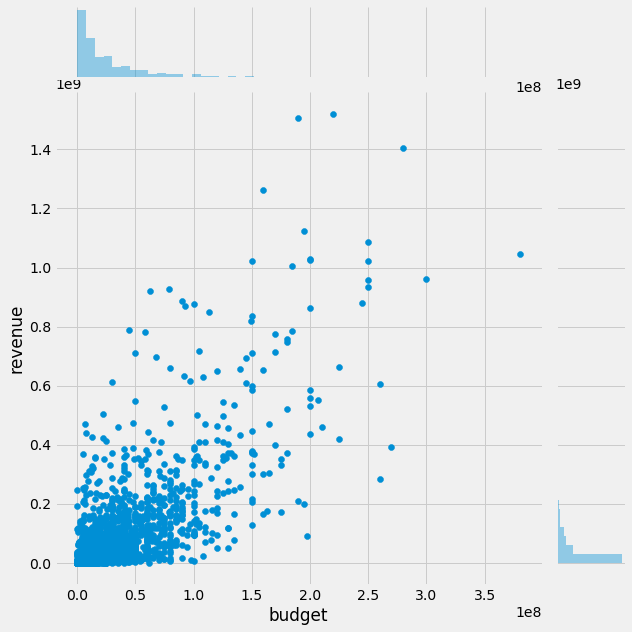

In [136]:
sns.jointplot(x=train['budget'], y=train['revenue'], height=9, ratio=6)

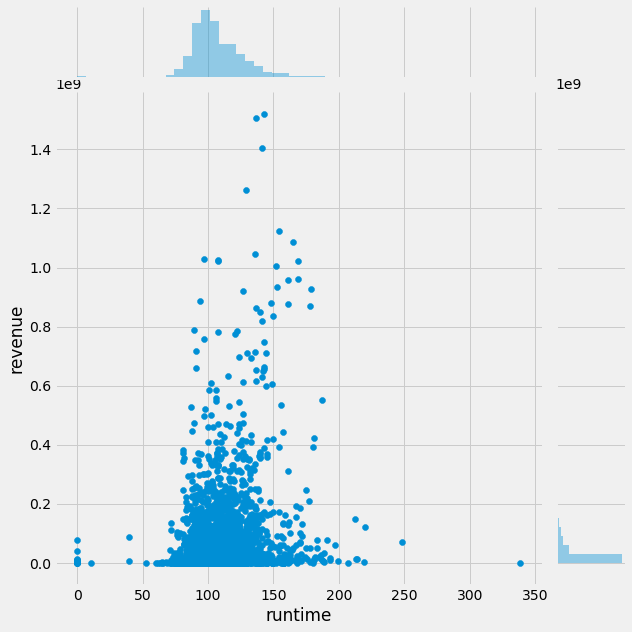

In [137]:
sns.jointplot(x=train['runtime'], y=train['revenue'], height=9, ratio=6)

## Date_released and how do other variables relate to date_released:
I found date_released to be an really interesting variable. It can be a lens by which we can discover the trends and patterns of the movie market. Before digging into the dataset, I have these questions in mind:
- How do revenues fluctuate along these years?
- How do revenues fluctuate between different months of each year? 
- Do lengths of films change?  

In [138]:
#Since only last two digits of year are provided, this is the correct way of getting the year.
train[['release_month','release_day','release_year']]=train['release_date'].str.split('/',expand=True).replace(np.nan, -1).astype(int)
# Some rows have 4 digits of year instead of 2, that's why I am applying (train['release_year'] < 100) this condition
train.loc[ (train['release_year'] <= 19) & (train['release_year'] < 100), "release_year"] += 2000
train.loc[ (train['release_year'] > 19)  & (train['release_year'] < 100), "release_year"] += 1900

releaseDate = pd.to_datetime(train['release_date']) 
train['release_dayofweek'] = releaseDate.dt.dayofweek
train['release_quarter'] = releaseDate.dt.quarter

### A General View: 

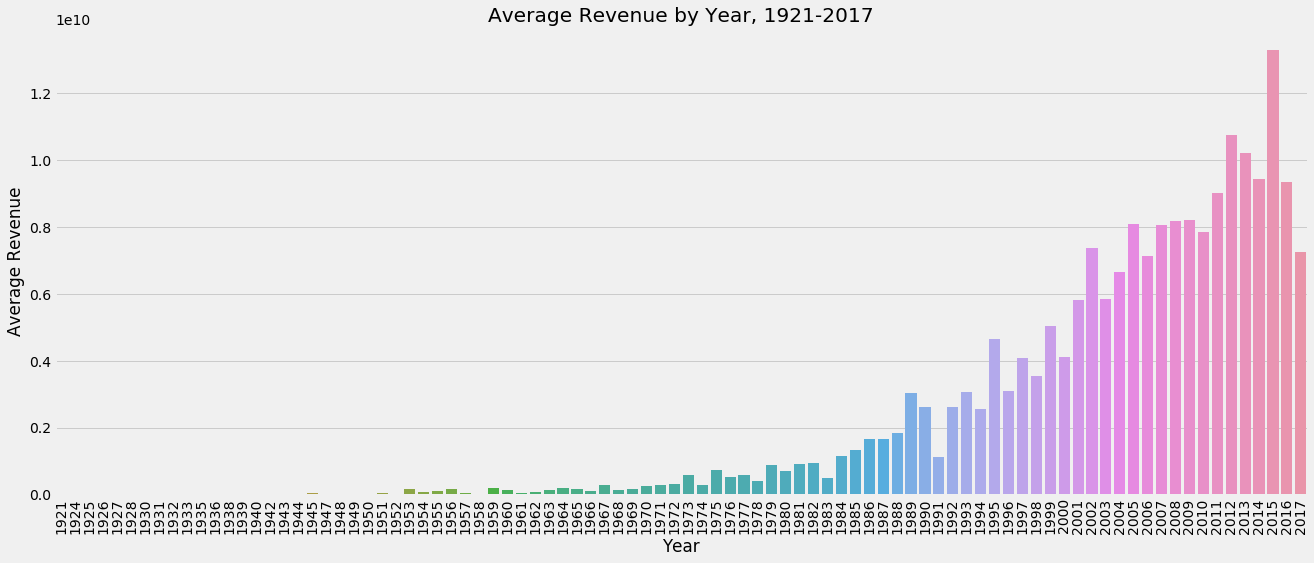

In [139]:
plt.rcParams['figure.figsize'] = [20, 8]

avg_rev_by_year = train.groupby('release_year')['revenue'].sum()
avg_rev_by_year_plot = sns.barplot(x=avg_rev_by_year.index, y=avg_rev_by_year.values)
avg_rev_by_year_plot.set_xticklabels(labels=avg_rev_by_year.index, rotation=90)
avg_rev_by_year_plot.set(xlabel='Year', ylabel='Average Revenue', title='Average Revenue by Year, 1921-2017')
plt.show()

#### We can see that there can be huge difference between average revenues between the years. Interestingly, if you take a look at the history of Hollywood, 

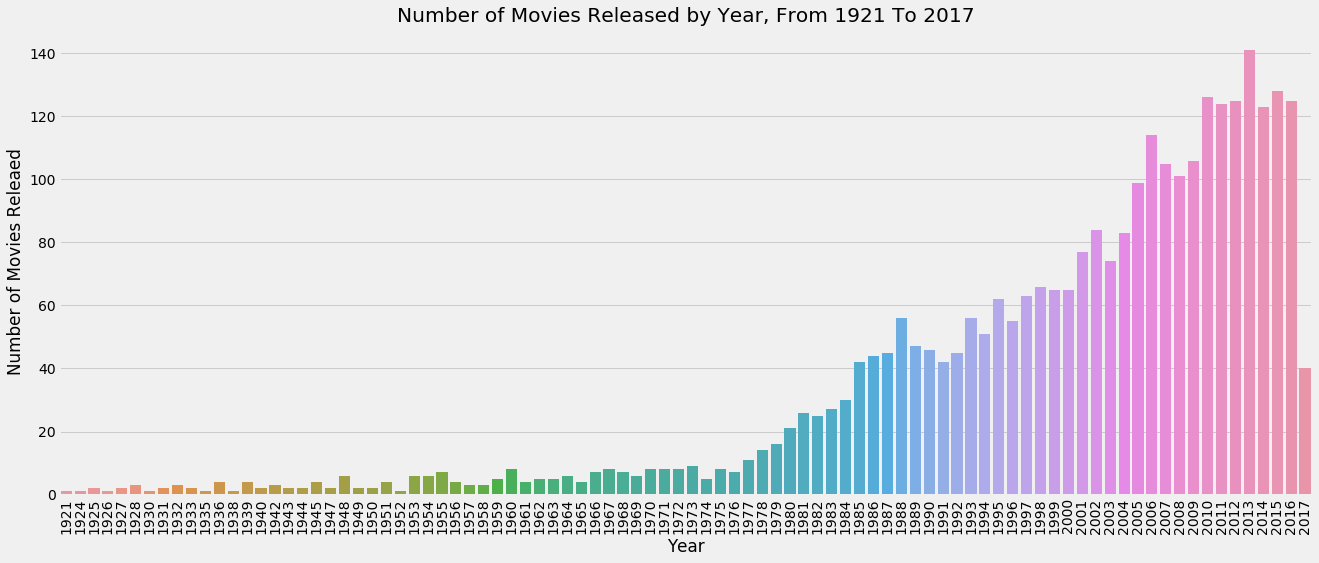

In [140]:
num_by_year = train.groupby('release_year')['imdb_id'].count()
num_by_year_plot = sns.barplot(x=num_by_year.index, y=num_by_year.values)
num_by_year_plot.set_xticklabels(labels=num_by_year.index, rotation=90)
num_by_year_plot.set(xlabel='Year', ylabel='Number of Movies Releaed', title='Number of Movies Released by Year, From 1921 To 2017')
plt.show()

#### Total number of movies released per year increased along the years obviously.

### Runtime:

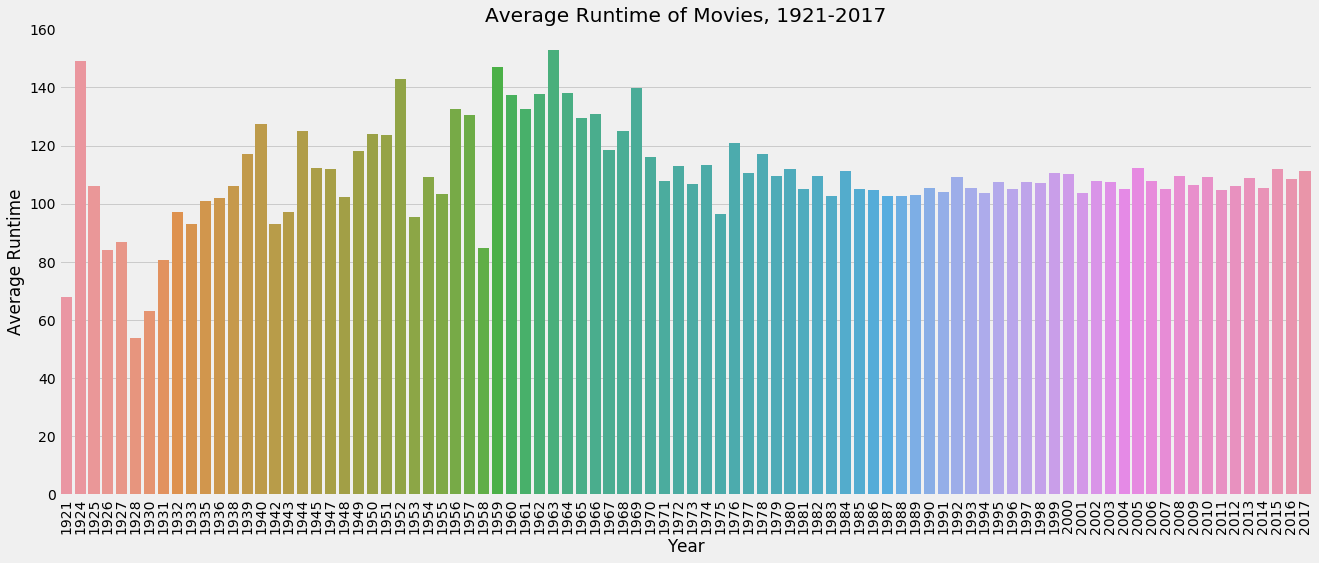

In [141]:
avg_runtime_by_year = train.groupby('release_year')['runtime'].mean()
avg_runtime_by_year_plot = sns.barplot(x=avg_runtime_by_year.index, y =avg_runtime_by_year.values)
avg_runtime_by_year_plot.set_xticklabels(labels=avg_runtime_by_year.index, rotation=90)
avg_runtime_by_year_plot.set(xlabel='Year', ylabel='Average Runtime', title='Average Runtime of Movies, 1921-2017')
plt.show()

#### There no clear trend for the length of movies.

### Revenue by Month / Number of Movies Released by Month:

[Text(0, 0.5, 'Average Revenue'),
 Text(0.5, 0, 'Month'),
 Text(0.5, 1.0, 'Average Revenues by Month, 1921-2017')]

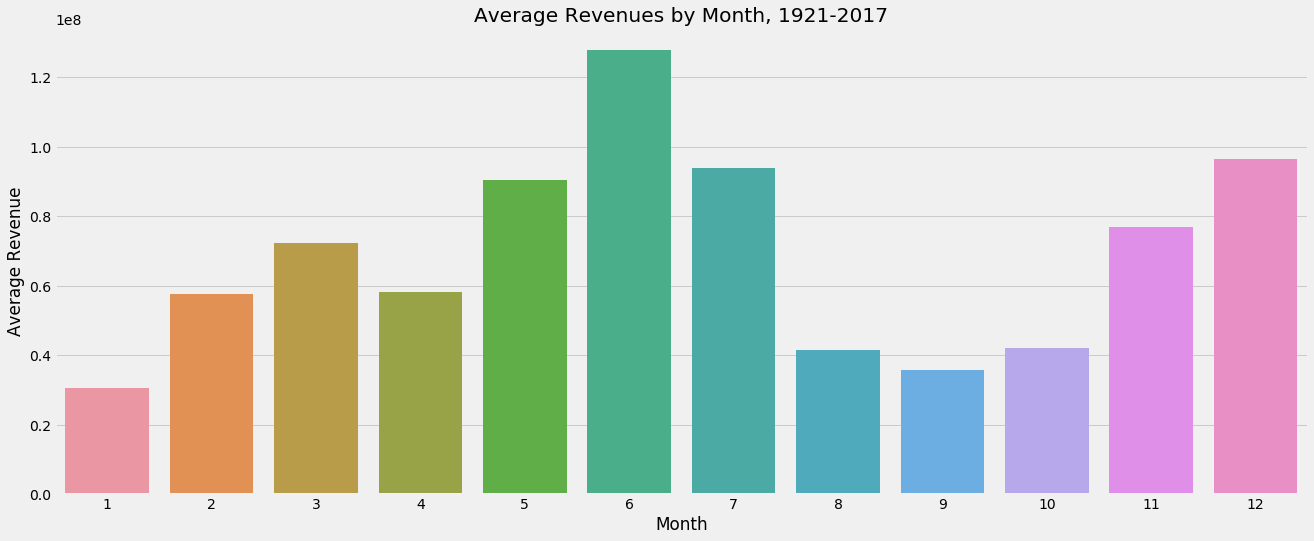

In [142]:
avg_rev_by_month = train.groupby('release_month')['revenue'].mean()
avg_rev_by_month_plot = sns.barplot(x= avg_rev_by_month.index, y=avg_rev_by_month.values)
avg_rev_by_month_plot.set(xlabel='Month', ylabel='Average Revenue', title='Average Revenues by Month, 1921-2017')

#### By observing the average monthly revenues through 1921 to 2017, a trend can be found that average revenues were lowest between Jan to Feb and again Aug to Sept.

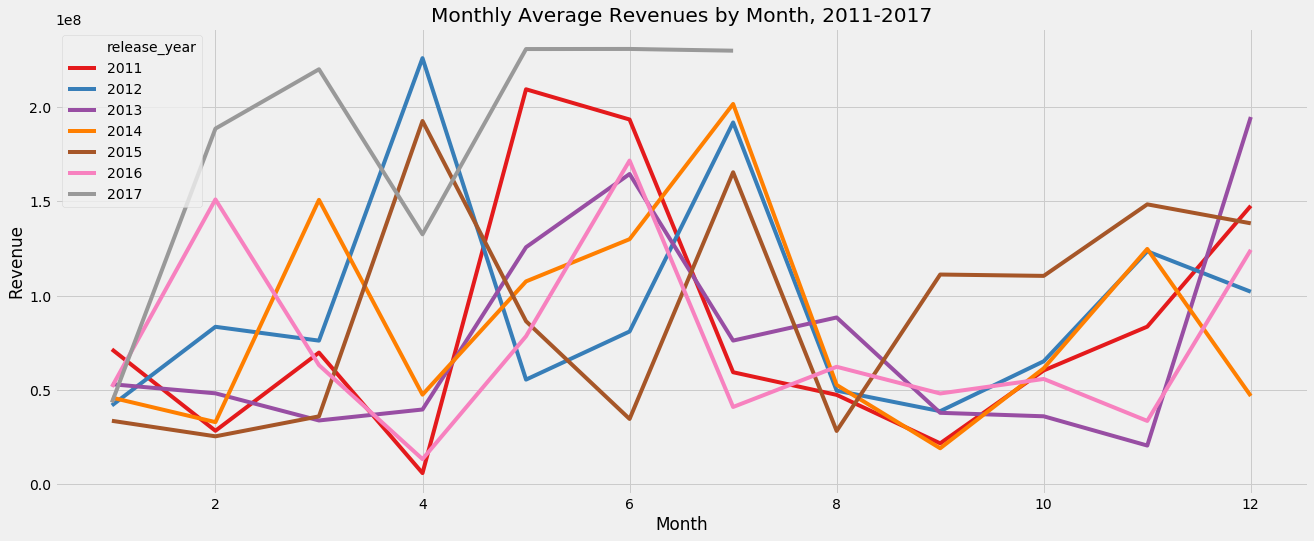

In [143]:
df = train[train['release_year'] > 2010]
avg_rev_by_year_and_month = df.groupby(['release_year', 'release_month'], as_index=False)['revenue'].mean()
avg_rev_by_year_and_month_plot = sns.lineplot(data=avg_rev_by_year_and_month, x='release_month', y='revenue', hue = 'release_year', legend = 'full', palette='Set1')
avg_rev_by_year_and_month_plot.set(xlabel='Month', ylabel='Revenue', title='Monthly Average Revenues by Month, 2011-2017')
avg_rev_by_year_and_month_plot

**The same trend can be found when taking a closer look at monthly average revenues between 2010-2017.**

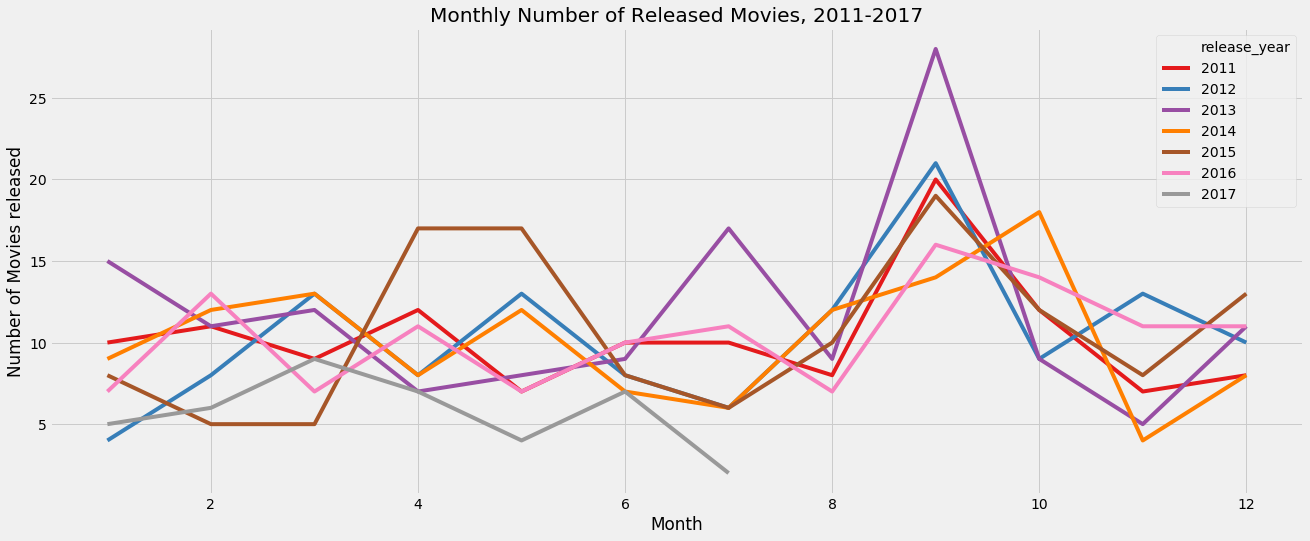

In [144]:
num_of_movies_by_year_and_month = df.groupby(['release_year', 'release_month'], as_index=False)['imdb_id'].count()
num_of_movies_by_year_and_month_plot = sns.lineplot(data=num_of_movies_by_year_and_month, x='release_month', y='imdb_id', hue='release_year', legend='full', palette='Set1')
num_of_movies_by_year_and_month_plot.set(xlabel='Month', ylabel='Number of Movies released', title='Monthly Number of Released Movies, 2011-2017')
plt.show()

**By contrast, August to October see the most number of movies released when we look at the data from 2011-2017. (The same pattern persists for previous years also.)**


**A closer look at this trend is provided below, where we can compare the average revenues with number of releases each year:**

In [145]:
def display_monthly_avg_rev_by_year(year):
    df = train[train['release_year'] == year]
    table = df.groupby('release_month')['revenue'].mean()
    avg_rev_by_month_plot = sns.barplot(x=table.index, y=table.values)
    avg_rev_by_month_plot.set(xlabel='Month', ylabel='Average Revenue', title='Average Revenues by Month in '+ str(year))
    plt.show()
    
def display_monthly_num_of_movies_by_year(year):
    df = train[train['release_year'] == year]
    table = df.groupby('release_month', as_index=False)['imdb_id'].count()
    plot = sns.barplot(data=table, x='release_month', y='imdb_id')
    plot.set(xlabel='Month', ylabel='Number of Movies released', title='Number of Released Movies by Month in ' + str(year))
    plt.show()

def compare_num_with_rev_by_year(year):
    display_monthly_avg_rev_by_year(year)
    display_monthly_num_of_movies_by_year(year)


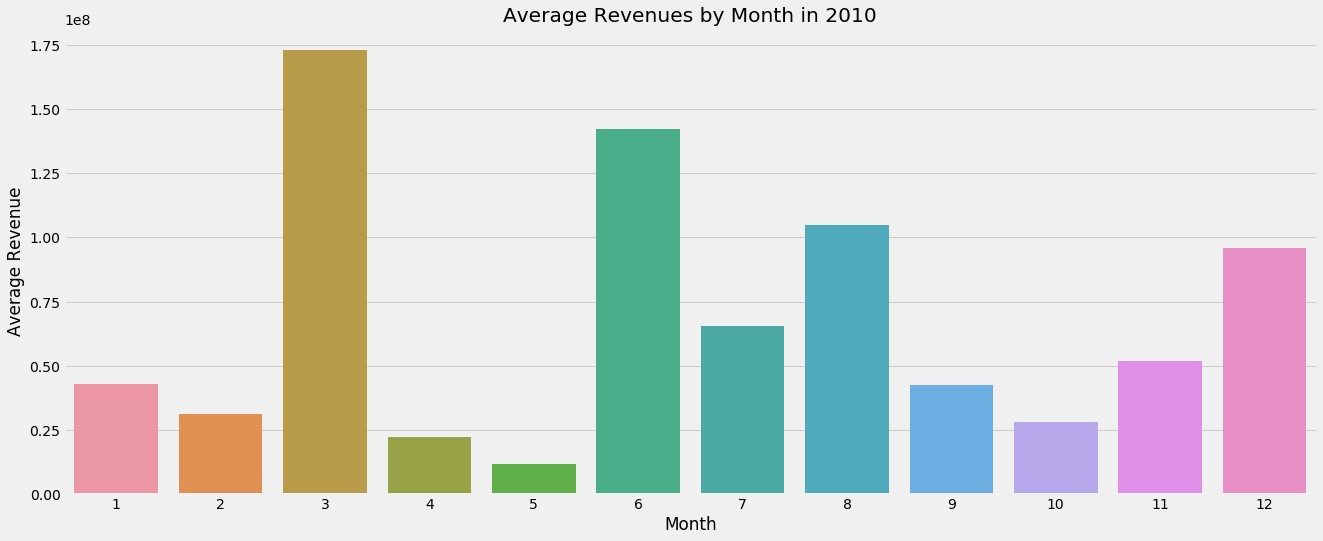

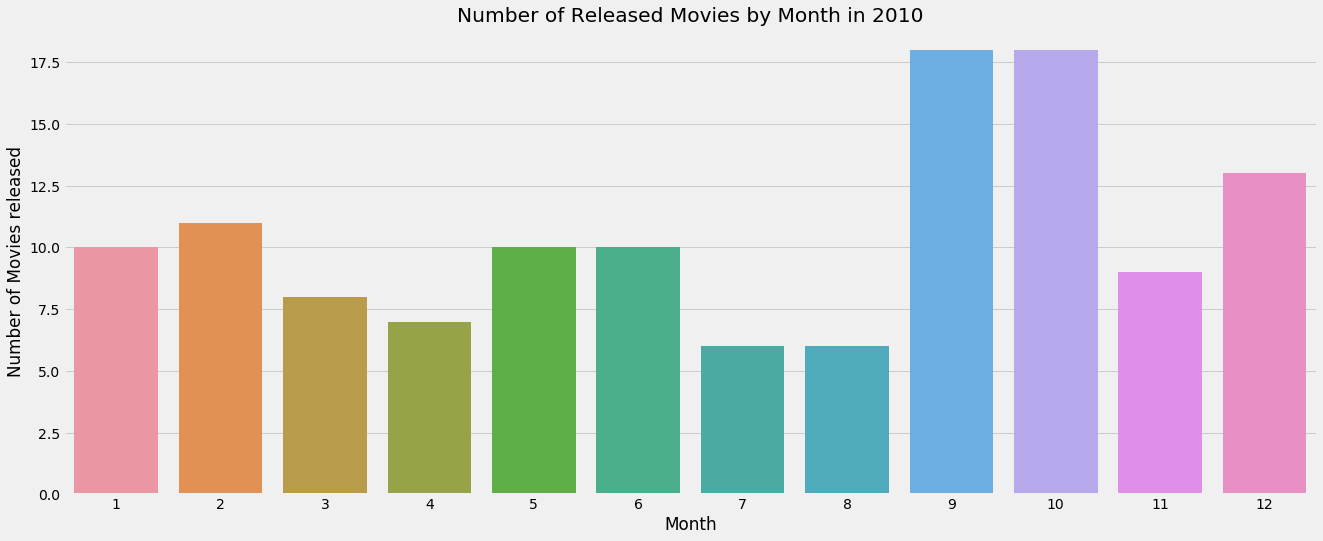

In [146]:
compare_num_with_rev_by_year(2010)

A trend can be identified by comparing monthly number of movies released and monthly average revenues: they seem to be inversely correlated.

#### Genre:

In [147]:
def get_dictionary(s):
    try:
        d = eval(s)
    except:
        d = {}
    return d
train = train
train['genres'] = train['genres'].map(lambda x: sorted([d['name'] for d in get_dictionary(x)])).map(lambda x: ','.join(map(str, x)))

genres = train.genres.str.get_dummies(sep=',')
# # train = pd.concat([train, genres], axis=1, sort=False)
# print("Action:", train[train['Action'] == 1].shape[0])
# print("Adventure:", train[train.Adventure == 1].shape[0])
# print("Animation:", train[train.Animation == 1].shape[0])
# print("Comedy:", train[train.Comedy == 1].shape[0])
# print("Crime:", train[train.Crime == 1].shape[0])
# print("Documentary:", train[train.Documentary == 1].shape[0])
# print("Drama:", train[train.Drama == 1].shape[0])
# print("Family:", train[train.Family == 1].shape[0])
# print("Fantasy:", train[train.Fantasy == 1].shape[0])
# print("Foreign:", train[train.Foreign == 1].shape[0])
# print("History:", train[train.History == 1].shape[0])
# print("Music:", train[train.Music == 1].shape[0])
# print("Mystery ", train[train.Mystery == 1].shape[0])
# print("Romance", train[train.Romance == 1].shape[0])
# print("Science ", train[train['Science Fiction'] == 1].shape[0])
# print("TV: ", train[train['TV Movie'] == 1].shape[0])
# print("Thriller: ", train[train.Thriller == 1].shape[0])
# print("War:", train[train.War == 1].shape[0])
# print("Western: ", train[train.Western == 1].shape[0])

In [199]:
train = pd.concat([train, genres], axis=1, sort=False)
genres = train.genres.str.get_dummies(sep=',')
genres.columns

Index(['Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western'],
      dtype='object')

In [149]:
train[train['genres'].str.contains('TV')]

,belongs_to_collection,budget,genres,imdb_id,original_language,production_companies,production_countries,release_date,runtime,spoken_languages,...,Keywords,cast,crew,revenue,earn_money,release_month,release_day,release_year,release_dayofweek,release_quarter
1693,NaN,5000000.0,"Adventure,Drama,Science Fiction,TV Movie",tt0116118,en,"[{'name': 'Universal TV', 'id': 537}, {'name':...","[{'iso_3166_1': 'CA', 'name': 'Canada'}, {'iso...",3/31/96,89.0,"[{'iso_639_1': 'en', 'name': 'English'}]",...,"[{'id': 1507, 'name': 'clock'}, {'id': 3667, '...","[{'cast_id': 3, 'character': 'The Doctor', 'cr...","[{'credit_id': '58b862109251415fcf0007da', 'de...",42000000,True,3,31,1996,6,1


**Only one movie has genre 'TV', so I decided to remove this genre.** 

In [177]:
train.loc[train['genres'].str.contains('TV'), 'genres'] = 'Adventure,Drama,Science Fiction'

**Compare the revenues between different genres throughout the years:**

In [238]:
rev_list = []
for year in sorted(train['release_year'].unique()):
    df = train[train['release_year'] == year]
    rev_this_year = []
    rev_this_year.append(year)
    for genre in genres.columns:
        rev_this_year.append(df[df[genre] == 1]['revenue'].mean())
    rev_list.append(rev_this_year)
    
genre_avg_rev_by_year = pd.DataFrame(rev_list, columns=['Year','Action', 'Adventure', 'Animation', 'Comedy', 'Crime', 'Documentary',
       'Drama', 'Family', 'Fantasy', 'Foreign', 'History', 'Horror', 'Music',
       'Mystery', 'Romance', 'Science Fiction', 'Thriller', 'War', 'Western'] )
    

/home/shenghao/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3666: UserWarning: The `factorplot` function has been renamed to `catplot`. The original name will be removed in a future release. Please update your code. Note that the default `kind` in `factorplot` (`'point'`) has changed `'strip'` in `catplot`.
  warnings.warn(msg)
/home/shenghao/anaconda3/lib/python3.7/site-packages/seaborn/categorical.py:3672: UserWarning: The `size` paramter has been renamed to `height`; please update your code.
  warnings.warn(msg, UserWarning)


<bound method Grid.set of <seaborn.axisgrid.FacetGrid object at 0x7f7c22825a20>>

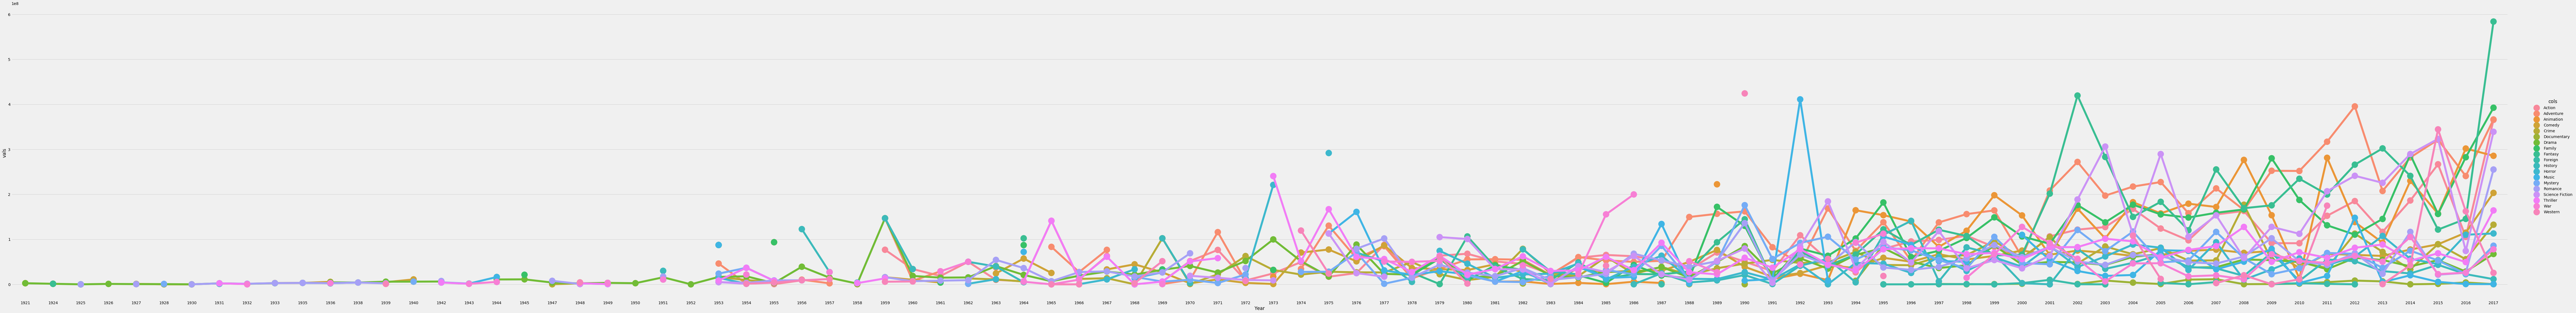

In [239]:
genre_avg_rev_by_year
genre_avg_rev_by_year = genre_avg_rev_by_year.melt('Year', var_name='cols',  value_name='vals')
g = sns.factorplot(x="Year", y="vals", hue='cols', data=genre_avg_rev_by_year, size=16, aspect=8)
g.set

In [232]:
genre_avg_rev_by_year

,Year,cols,vals
0,1921,cols,cols
1,1924,cols,cols
2,1925,cols,cols
3,1926,cols,cols
4,1927,cols,cols
5,1928,cols,cols
6,1930,cols,cols
7,1931,cols,cols
8,1932,cols,cols
9,1933,cols,cols


### Summary for release_year and release_month:
1. Revenues are generally low during Jan to Feb, also Aug to Sept. There are called Dump Months, more information can be found at:
    - https://www.wikiwand.com/en/Dump_months
    - https://web.archive.org/web/20151012234912/http://www.theatlantic.com/entertainment/archive/2012/01/january-dumping-ground-for-terrible-movies-like-contraband/251326/
    - https://web.archive.org/web/20150922062108/http://www.avclub.com/article/hollywoods-trash-our-treasure-17-salvageable-flops-91570
    

### Categorical Variables:

#### Original Language:

In [89]:
train['production_countries'][0]

"[{'iso_3166_1': 'US', 'name': 'United States of America'}]"